/tmp/ipython-input-4099586891.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2010-01-01', end='2025-09-05')
[*********************100%***********************]  1 of 1 completed


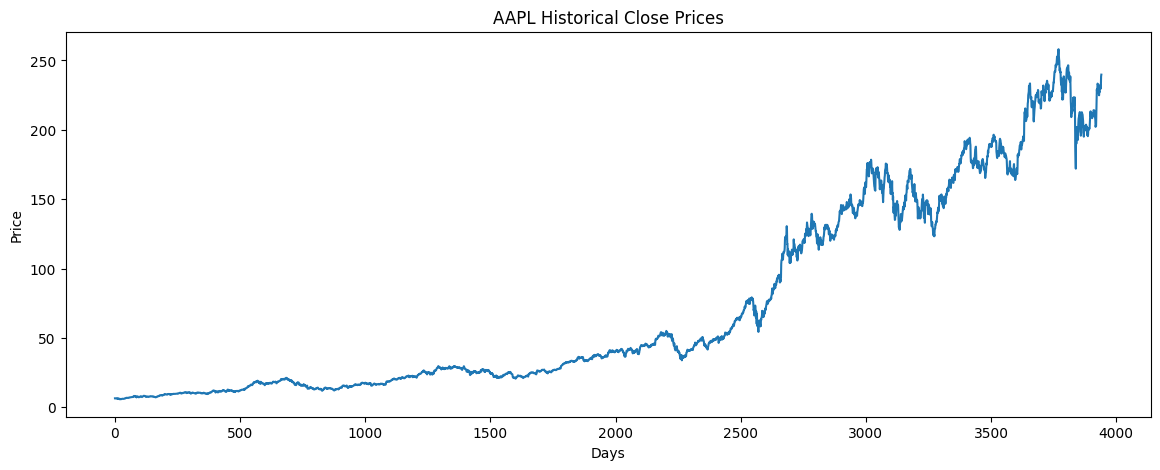

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 5.1088e-05 - val_loss: 0.0022
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - loss: 4.2092e-05 - val_loss: 0.0014
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - loss: 3.3590e-05 - val_loss: 0.0028
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - loss: 3.9896e-05 - val_loss: 0.0016
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - loss: 3.3964e-05 - val_loss: 0.0019
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 3.0927e-05 - val_loss: 0.0016
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - loss: 3.1746e-05 - val_loss: 0.0024
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - loss: 3.2328e-05 - val_loss: 0.0015
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - loss: 2.6301e-05 - val_loss: 0.0021
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - loss: 2.6585e-05 - val_loss: 0

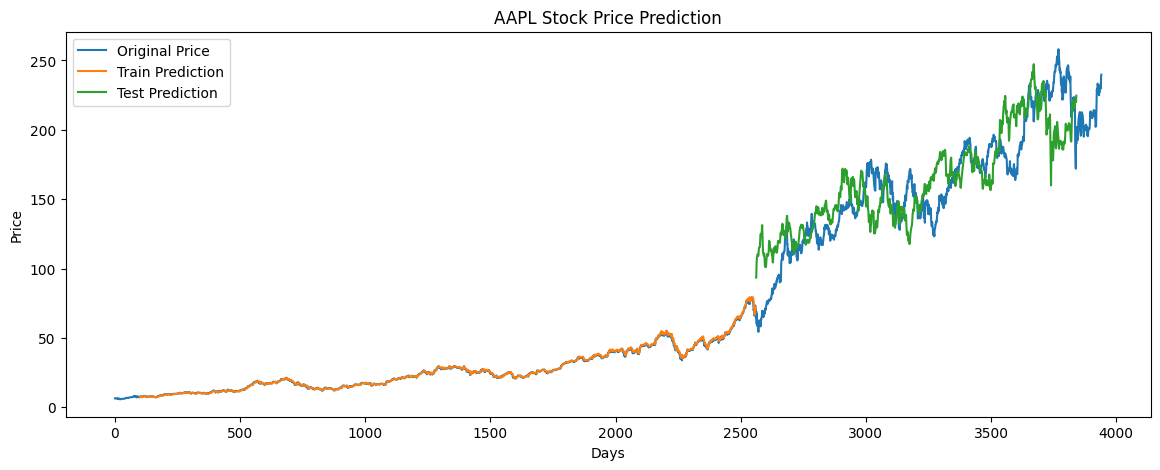

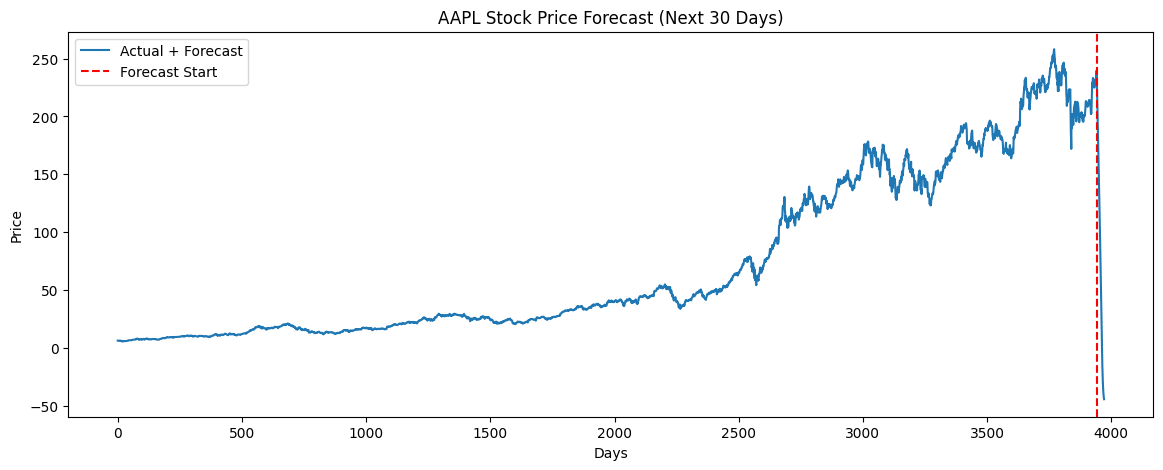

In [ ]:
 -----------------------------
!pip install yfinance --quiet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 2. Fetch stock data using yfinance

df = yf.download('AAPL', start='2010-01-01', end='2025-09-05')
df.reset_index(inplace=True)
df.head()

# -----------------------------
# 3. Extract 'Close' prices
# -----------------------------
data = df['Close'].values.reshape(-1, 1)

plt.figure(figsize=(14,5))
plt.plot(data)
plt.title("AAPL Historical Close Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


# 4. Scale data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


# 5. Train-test split

training_size = int(len(scaled_data) * 0.65)
test_size = len(scaled_data) - training_size
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

# -----------------------------
# 6. Function to create sequences for LSTM
# -----------------------------
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# 7. Build Stacked LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


# 8. Train the model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=64, verbose=1)


# 9. Make predictions

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# RMSE
train_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)), train_predict))
test_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)), test_predict))
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
# 10. Plot predictions

look_back = time_step
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[look_back:look_back+len(train_predict), :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[look_back+len(train_predict):look_back+len(train_predict)+len(test_predict), :] = test_predict

plt.figure(figsize=(14,5))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Price')
plt.plot(train_plot, label='Train Prediction')
plt.plot(test_plot, label='Test Prediction')
plt.title("AAPL Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

# 11. Forecast next 30 days
temp_input = list(test_data[-time_step:].flatten())
lst_output = []
n_steps = time_step
num_days = 30

for i in range(num_days):
    x_input = np.array(temp_input[-n_steps:]).reshape(1, n_steps, 1)
    yhat = model.predict(x_input, verbose=0)
    temp_input.append(yhat[0,0])
    lst_output.append(yhat[0,0])

# Combine actual + forecast
future_days = np.arange(len(scaled_data)+1, len(scaled_data)+num_days+1)
all_data = np.concatenate((scaled_data, np.array(lst_output).reshape(-1,1)), axis=0)

plt.figure(figsize=(14,5))
plt.plot(scaler.inverse_transform(all_data), label='Actual + Forecast')
plt.axvline(x=len(scaled_data), color='r', linestyle='--', label='Forecast Start')
plt.title("AAPL Stock Price Forecast (Next 30 Days)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
